# <center>Проект: Вариант 1</center>
**<center>Представьте, что вы работаете в компании, которая разрабатывает мобильные игры. К вам пришел менеджер с рядом задач по исследованию нескольких аспектов мобильного приложения:</center>**

## <center>Задание 1</center>                                                      
**<center>Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока.<center>**


Количество уникальных идентификаторов пользователей в reg_data: 1000000
Количество уникальных идентификаторов пользователей в auth_data: 1000000
Общее количество пользователей с временем захода, но без времени регистрации: 0
day
0       100.0000
1         4.0202
2         4.2991
3         4.9152
4         5.6070
          ...   
7715      0.0001
7719      0.0001
7720      0.0001
7726      0.0001
7728      0.0001
Length: 5916, dtype: float64


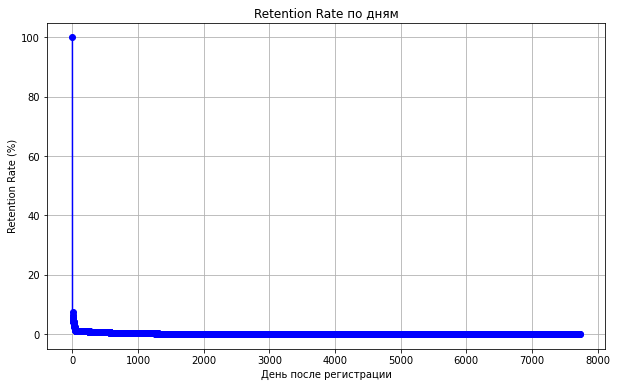

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
reg_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-ustimova/shared/problem1-reg_data.csv', sep=';')
auth_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-ustimova/shared/problem1-auth_data.csv', sep=';')

# Количество уникальных идентификаторов пользователей
unique_uid_reg = reg_data['uid'].nunique()
unique_uid_auth = auth_data['uid'].nunique()
print(f"\nКоличество уникальных идентификаторов пользователей в reg_data: {unique_uid_reg}")
print(f"Количество уникальных идентификаторов пользователей в auth_data: {unique_uid_auth}")

# Проверка на дубликаты
if reg_data.duplicated().any() or auth_data.duplicated().any():
    print("Данные содержат дубликаты. Пожалуйста, выполните необходимую обработку.")
else:
# Проверка на пропущенные значения
    if reg_data.isnull().values.any() or auth_data.isnull().values.any():
        print("Данные содержат пропущенные значения. Пожалуйста, выполните необходимую обработку.")
    else:
# Пользователи с временем захода без времени регистрации
        users_without_registration = auth_data[~auth_data['uid'].isin(reg_data['uid'])]

# Общее количество пользователей
        total_users_without_registration = users_without_registration['uid'].nunique()
        print(f"Общее количество пользователей с временем захода, но без времени регистрации: {total_users_without_registration}")

# Преобразование дат в формат datetime64
reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit='s')
auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit='s')

# Объединение данных по уникальному идентификатору uid
merged_data = pd.merge(reg_data, auth_data, on='uid', how='inner')

# Функция для расчета retention игроков с переводом в проценты
def calculate_retention(data):
    data['day'] = (data['auth_ts'] - data['reg_ts']).dt.days
    retention_rate = data.groupby('day').size() / data['uid'].nunique() * 100
    return retention_rate

# Расчет retention 
retention_rate = calculate_retention(merged_data)
print(retention_rate)

# Визуализация ретеншена 
plt.figure(figsize=(10, 6))
plt.plot(retention_rate.index, retention_rate.values, marker='o', color='b')
plt.xlabel('День после регистрации')
plt.ylabel('Retention Rate (%)')
plt.title('Retention Rate по дням')
plt.grid(True)
plt.show()

## <center>Задание 2<center>
**<center>Имеются результаты A/B теста, в котором двум группам пользователей предлагались различные наборы акционных предложений. Известно, что ARPU в тестовой группе выше на 5%, чем в контрольной. При этом в контрольной группе 1928 игроков из 202103 оказались платящими, а в тестовой – 1805 из 202667.**<center>

**<center>Какие метрики стоит проанализировать для принятия правильного решения и как?<center>**
  

           Для определения лучшего набора предложений (A или B) можно проанализировать следующие метрики:
    
    
1. ARPU  - средний доход с пользователя. 
    
2. ARPPU - показывает средний доход, который приносит каждый платящий пользователь.
    
3. LTV - средний доход, который приносит пользователь за всё время использования продукта. 

4. Conversion Rate - процентное соотношение между количеством пользователей, совершивших целевое действие (конверсию), и общим количеством пользователей, которые могли совершить это действие.

5. Average Order Value (AOV) - средний чек за один заказ пользователя.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-ustimova/shared/problem2.csv', sep=';')

# Группировка данных по testgroup
grouped_data = data.groupby('testgroup')

# Подсчет количества платящих пользователей в каждой группе
paying_users = grouped_data['revenue'].apply(lambda x: (x > 0).sum())

# Подсчет общего количества пользователей в каждой группе
total_users = grouped_data['user_id'].nunique()

# Подсчет ARPU в каждой группе
arpu = grouped_data['revenue'].sum() / total_users

# Подсчет ARPPU в каждой группе
arppu = grouped_data['revenue'].sum() / paying_users

# Подсчет LTV в каждой группе
ltv = grouped_data['revenue'].sum() / total_users

# Подсчет Conversion Rate в каждой группе
conversion_rate = paying_users / total_users

# Подсчет Average Order Value (AOV) в каждой группе
aov = grouped_data['revenue'].sum() / paying_users

# Вывод результатов
print("\nМетрики для контрольной и тестовой групп:")
print("ARPU:")
print(arpu)
print("\nARPPU:")
print(arppu)
print("\nLTV:")
print(ltv)
print("\nConversion Rate:")
print(conversion_rate)
print("\nAverage Order Value (AOV):")
print(aov)


Метрики для контрольной и тестовой групп:
ARPU:
testgroup
a    25.413720
b    26.751287
dtype: float64

ARPPU:
testgroup
a    2663.998444
b    3003.658172
Name: revenue, dtype: float64

LTV:
testgroup
a    25.413720
b    26.751287
dtype: float64

Conversion Rate:
testgroup
a    0.009540
b    0.008906
dtype: float64

Average Order Value (AOV):
testgroup
a    2663.998444
b    3003.658172
Name: revenue, dtype: float64


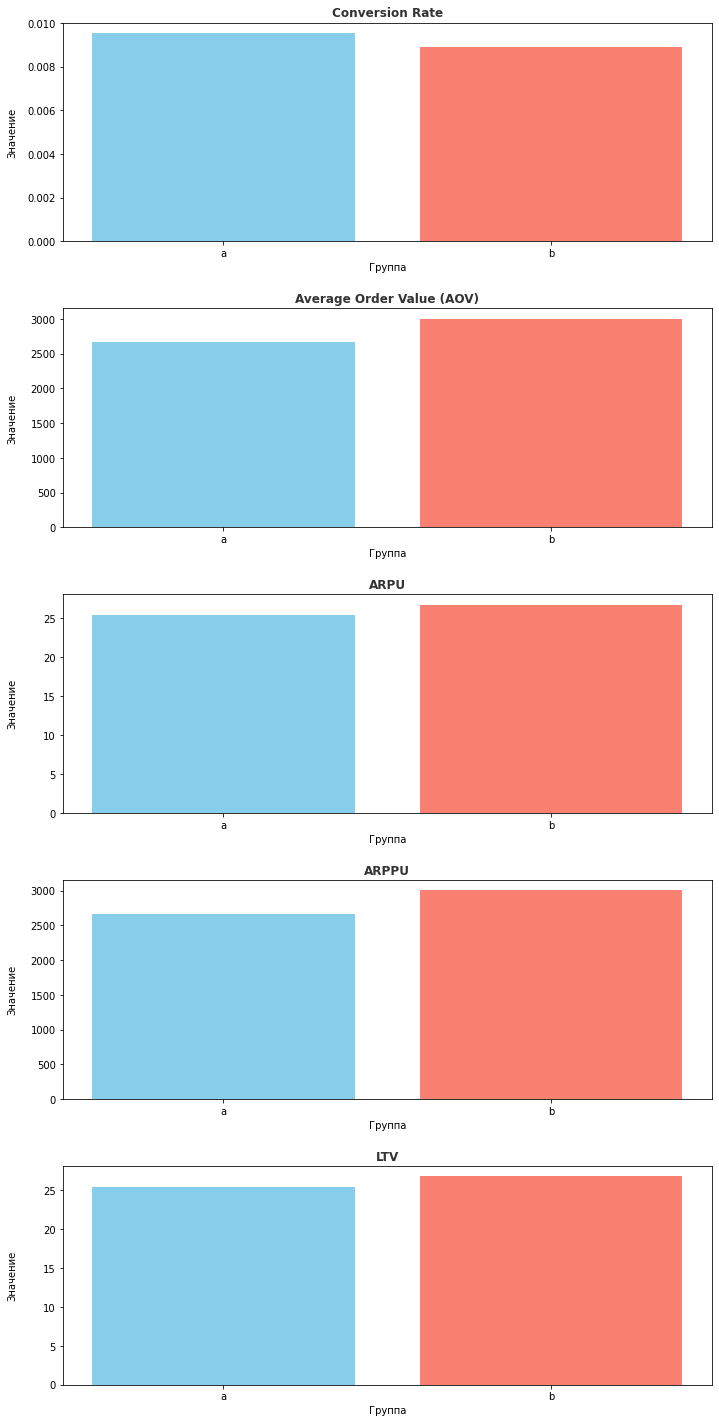

In [4]:
# Визуализация метрик
groups = ['a', 'b']

# Создание списка значений метрик для Conversion Rate, AOV, ARPU, ARPPU и LTV
conversion_rate_values = [conversion_rate.loc['a'], conversion_rate.loc['b']]
aov_values = [aov.loc['a'], aov.loc['b']]
arpu_values = [arpu.loc['a'], arpu.loc['b']]
arppu_values = [arppu.loc['a'], arppu.loc['b']]
ltv_values = [ltv.loc['a'], ltv.loc['b']]

# Построение столбчатых диаграмм для каждой метрики
fig, ax = plt.subplots(5, 1, figsize=(10, 20))

# Увеличение расстояния между диаграммами
plt.subplots_adjust(hspace=10000)

# Диаграмма для Conversion Rate
ax[0].bar(groups, conversion_rate_values, color=['skyblue', 'salmon'])
ax[0].set_title('Conversion Rate',fontweight='bold', color='#333333')
ax[0].set_ylabel('Значение')
ax[0].set_xlabel('Группа')

# Диаграмма для Average Order Value (AOV)
ax[1].bar(groups, aov_values, color=['skyblue', 'salmon'])
ax[1].set_title('Average Order Value (AOV)',fontweight='bold', color='#333333')
ax[1].set_ylabel('Значение')
ax[1].set_xlabel('Группа')

# Диаграмма для ARPU
ax[2].bar(groups, arpu_values, color=['skyblue', 'salmon'])
ax[2].set_title('ARPU',fontweight='bold', color='#333333')
ax[2].set_ylabel('Значение')
ax[2].set_xlabel('Группа')

# Диаграмма для ARPPU
ax[3].bar(groups, arppu_values, color=['skyblue', 'salmon'])
ax[3].set_title('ARPPU',fontweight='bold', color='#333333')
ax[3].set_ylabel('Значение')
ax[3].set_xlabel('Группа')

# Диаграмма для LTV
ax[4].bar(groups, ltv_values, color=['skyblue', 'salmon'])
ax[4].set_title('LTV',fontweight='bold', color='#333333')
ax[4].set_ylabel('Значение')
ax[4].set_xlabel('Группа')

# Сдвиг названия оси Y дальше от шкалы
for axis in ax:
    axis.yaxis.set_label_coords(-0.07, 0.5)
    
plt.tight_layout()
plt.show()

**<center>Проанализируем предоставленные метрики для контрольной (группа "a") и тестовой (группа "b") групп:<center>**
1. ARPU (Average Revenue Per User) - группа "b" имеет более высокий ARPU, что может указывать на то, что пользователи из этой группы в среднем приносят больше выручки компании.

2. ARPPU (Average Revenue Per Paying User) - группа "b" также имеет более высокий ARPPU, что может означать, что платящие пользователи из этой группы тратят больше денег на покупки.

3. LTV (Lifetime Value) - значения LTV для обеих групп одинаковы, что может говорить о схожем уровне доходности пользователей в долгосрочной перспективе.

4. Conversion Rate - группа "a" имеет более высокий Conversion Rate, что может указывать на более эффективную конверсию пользователей в целевые действия.

5. Average Order Value (AOV) - группа "b" имеет более высокий AOV, что может означать, что средний чек заказа в этой группе выше.

Исходя из анализа метрик, можно сделать вывод, что группа "b" имеет более высокие показатели ARPU, ARPPU и AOV, что может указывать на более успешные результаты в плане доходности и среднего чека. Однако, группа "a" имеет более высокий Conversion Rate, что может говорить о более эффективной конверсии пользователей. Далее необходимо убедиться, что различия статистически значимы (для этого проведем A/B тестирование). 


        
        
**<center>Для начала проведем Тест Шапиро-Уилка - это статистический тест, который используется для проверки гипотезы о нормальном распределении данных.<center>**
    
        Гипотезы, которые будем проверять:
Нулевые гипотезы (H0):
Данные группы a распределены нормально.
Данные группы b распределены нормально. 
    
Альтернативные гипотезы (H1):
Данные группы a не распределены нормально.
Данные группы b не распределены нормально. 
    
**<center>Далее проведем Тест Левена - это статистический тест, который используется для проверки гомогенности дисперсий (равенства дисперсий) между группами.<center>**
    
        Гипотезы, которые будем проверять:
Нулевая гипотеза (H0): 
Дисперсии данных групп a и b равны. 
    
Альтернативная гипотеза (H1): 
Дисперсии данных групп a и b не равны.



In [4]:
from scipy.stats import shapiro, levene

# Разделение данных по группам
data_a = data[data['testgroup'] == 'a']['revenue']
data_b = data[data['testgroup'] == 'b']['revenue']

# Проверка нормальности распределения
stat_a, p_a = shapiro(data_a)
stat_b, p_b = shapiro(data_b)

print('Тест Шапиро-Уилка для группы a:')
print('Статистика теста:', stat_a)
print('p-значение:', p_a)
if p_a > 0.05:
    print('Данные группы a распределены нормально')
else:
    print('Данные группы a не распределены нормально')

print('\nТест Шапиро-Уилка для группы b:')
print('Статистика теста:', stat_b)
print('p-значение:', p_b)
if p_b > 0.05:
    print('Данные группы b распределены нормально')
else:
    print('Данные группы b не распределены нормально')

# Проверка равенства дисперсий
stat, p = levene(data_a, data_b)
print('\nТест Левена для равенства дисперсий:')
print('Статистика теста:', stat)
print('p-значение:', p)
if p > 0.05:
    print('Дисперсии данных равны')
else:
    print('Дисперсии данных не равны')

Тест Шапиро-Уилка для группы a:
Статистика теста: 0.008876502513885498
p-значение: 0.0
Данные группы a не распределены нормально

Тест Шапиро-Уилка для группы b:
Статистика теста: 0.06588172912597656
p-значение: 0.0
Данные группы b не распределены нормально

Тест Левена для равенства дисперсий:
Статистика теста: 0.3896289474701388
p-значение: 0.5324948591043842
Дисперсии данных равны




**<center>Исходя из результатов тестов, можно сделать следующие выводы:<center>**
    
1. Данные для групп a и b не распределены нормально, так как p-значения теста Шапиро-Уилка меньше уровня значимости 0.05.
2. Дисперсии данных для групп a и b равны, так как p-значение теста Левена больше уровня значимости 0.05.

Исходя из того, что данные не распределены нормально, и дисперсии равны, для сравнения средних значений между группами a и b можно использовать непараметрический тест Манна-Уитни. Результаты теста Манна-Уитни позволят определить, есть ли статистически значимые различия между группами a и b. 

                            Гипотезы, которые будут проверяться в тесте Манна-Уитни: 
1. Нулевая гипотеза (H0): Средние ранги данных в выборках группы a и группы b равны.
2. Альтернативная гипотеза (H1): Средние ранги данных в выборках группы а и группы b не равны.


In [5]:
from scipy.stats import mannwhitneyu

# Проведение теста Манна-Уитни для сравнения средних значений
stat, p = mannwhitneyu(data_a, data_b)
print('\nТест Манна-Уитни для сравнения средних значений:')
print('Статистика теста:', stat)
print('p-значение:', p)
if p > 0.05:
    print('Нет статистически значимых различий между группами a и b')
else:
    print('Есть статистически значимые различия между группами a и b')


Тест Манна-Уитни для сравнения средних значений:
Статистика теста: 20491259376.0
p-значение: 0.06269701316074398
Нет статистически значимых различий между группами a и b


**<center>Анализ результатов:<center>**
    
Результаты теста Манна-Уитни показывают, что нет статистически значимых различий между группами a и b, так как p-значение (0.0627) больше уровня значимости 0.05. Это означает, что на основе проведенного анализа нет достаточных доказательств для того, чтобы утверждать, что средние значения в группах a и b различаются статистически значимо.
Следовательно, мы не можем отвергнуть нулевую гипотезу о равенстве средних значений выручки в группах a и b. Это означает, что на текущем уровне значимости (0.05) нет оснований считать, что средние значения выручки в этих двух группах различаются статистически значимо.


Проведем также Бутстрэп-анализ для сравнения средних значений ARPU (Average Revenue Per User) между двумя группами данных (группа 'a' и группа 'b). ARPU - это ключевой показатель, который позволяет оценить средний доход, который приносит каждый пользователь. 

В данном случае бутстрэп-анализ ARPU между двумя группами проверяет следующие гипотезы:

1. Нулевая гипотеза (H0): Средний ARPU в группе 'a' равен среднему ARPU в группе 'b'.
2. Альтернативная гипотеза (H1): Средний ARPU в группе 'a' не равен среднему ARPU в группе 'b'.

100%|██████████| 1000/1000 [00:17<00:00, 56.58it/s]


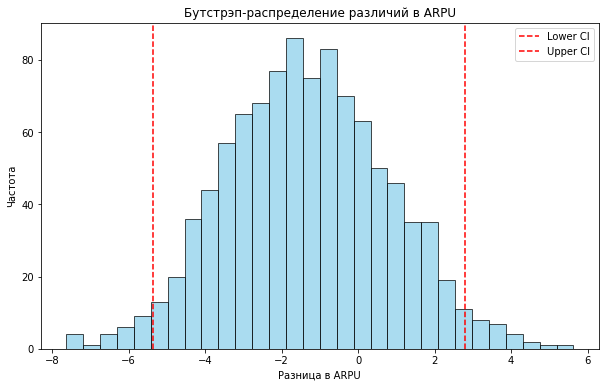

P-значение: 0.5278461174878477
Доверительный интервал:               0
0.025 -5.359951
0.975  2.803717


In [15]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from tqdm import tqdm
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-ustimova/shared/problem2.csv', sep=';')

# Разделение данных по группам
data_a = data[data['testgroup'] == 'a']['revenue']
data_b = data[data['testgroup'] == 'b']['revenue']

# Объявление функции для бутстрап-анализа ARPU
def get_bootstrap(data_column_1, data_column_2, boot_it=1000, statistic=np.mean, bootstrap_conf_level=0.95):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    
    for i in tqdm(range(boot_it)):
        samples_1 = data_column_1.sample(boot_len, replace=True).values
        samples_2 = data_column_2.sample(boot_len, replace=True).values
        boot_data.append(statistic(samples_1) - statistic(samples_2))
    
    pd_boot_data = pd.DataFrame(boot_data)
    
    left_quant = (1 - bootstrap_conf_level) / 2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
    
    p_1 = norm.cdf(x=0, loc=np.mean(boot_data), scale=np.std(boot_data))
    p_2 = norm.cdf(x=0, loc=-np.mean(boot_data), scale=np.std(boot_data))
    p_value = min(p_1, p_2) * 2
    
    return {"boot_data": boot_data, "ci": ci, "p_value": p_value}

# Вызов функции для анализа ARPU между двумя группами
booted_data = get_bootstrap(data_a, data_b)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.hist(booted_data['boot_data'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(booted_data['ci'].iloc[0].values[0], color='red', linestyle='--', label='Lower CI')
plt.axvline(booted_data['ci'].iloc[1].values[0], color='red', linestyle='--', label='Upper CI')
plt.xlabel('Разница в ARPU')
plt.ylabel('Частота')
plt.title('Бутстрэп-распределение различий в ARPU')
plt.legend()
plt.show()

# Вывод результатов
print("P-значение:", booted_data['p_value'])
print("Доверительный интервал:", booted_data['ci'])


**<center>Результаты бутстрэп-анализа:<center>**
    
Исходя из полученных результатов бутстрэп-анализа, мы не можем отвергнуть нулевую гипотезу о равенстве средних значений ARPU в группах "a" и "b", так как доверительный интервал включает нулевое значение и P-значение составляет 0.5278. Таким образом, на основании проведенного анализа, нет статистически значимой разницы в ARPU между двумя группами.

**<center>Какой набор предложений можно считать лучшим?<center>**
    
Проблематично определить, какой набор предложений лучше, используя только представленные данные. Исходя из анализа метрик, можно сделать вывод, что группа "b" имеет более высокие показатели ARPU, ARPPU и AOV, что может указывать на более успешные результаты в плане доходности и среднего чека. Однако, группа "a" имеет более высокий Conversion Rate, что может говорить о более эффективной конверсии пользователей. Касаемо ARPU, который в тестовой группе больше, статистическую значимость разницы подтвердить не удалось.




## <center>Задание 3<center>
                                                
**<center>В игре Plants & Gardens каждый месяц проводятся тематические события, ограниченные по времени. В них игроки могут получить уникальные предметы для сада и персонажей, дополнительные монеты или бонусы. Для получения награды требуется пройти ряд уровней за определенное время. С помощью каких метрик можно оценить результаты последнего прошедшего события?<center>**
**<center>Предположим, в другом событии мы усложнили механику событий так, что при каждой неудачной попытке выполнения уровня игрок будет откатываться на несколько уровней назад. Изменится ли набор метрик оценки результата? Если да, то как?<center>**


Для оценки результатов прошедшего события в игре Plants & Gardens можно использовать следующие метрики:

1. Retention Rate (коэффициент удержания) - процент игроков, которые участвовали в событии и вернулись в игру после его завершения. Это показатель активности, позволяющий оценить, насколько событие удерживает интерес игроков к игре.

2. Среднее количество пройденных уровней за время события - позволяет оценить, насколько уровни были интересны игрокам и насколько успешно они справились с ними.

3. Конверсия в прохождение всех уровней события - процент игроков, завершивших все уровни события. Это показатель эффективности механики событий.

4. ARPU (средний доход с игрока) - метрика позволяет оценить, насколько игроки заинтересованы в участии в событии.

Касательно изменения механики событий, при усложнении механики событий с откатом на несколько уровней назад при неудачной попытке, возможно, потребуется дополнительные метрики для оценки результатов:

1. Churn Rate (коэффициент оттока) - процент игроков, покинувших игру после изменения механики событий. Это позволит оценить, насколько новая механика затрудняющая прохождение уровней повлияла на удержание игроков в игре.

2. Время прохождения события - среднее время, за которое игроки проходили событие. Новая механика может привести к увеличению времени прохождения, к потере интереса игроками.

3. Среднее количество откатов - среднее количество раз, которые игроки откатываются назад при неудачной попытке. Это позволит оценить сложность уровней в игре.

Изменение механики событий может повлиять на выбор и важность определенных метрик. Например, при откатах на несколько уровней назад важно отслеживать Churn Rate и среднее количество откатов, чтобы понять, как новая механика влияет на удержание игроков и их удовлетворенность. Таким образом, набор метрик для оценки результатов событий может измениться в зависимости от изменений в игровой механике.